In [ ]:
import polars as pl
import pandas as pd

In [ ]:
df = pl.read_csv("./train.csv")

# Data Cleaning

In [ ]:
df2 = df.with_columns(
    pl.col("Name").map_elements(lambda x: x.split(', ')[0]).alias('Last'),
    pl.col("Name").map_elements(lambda x: x.split(', ')[1].split('. ')[1]).alias('First'),
    pl.col("Name").map_elements(lambda x: x.split(', ')[1].split('. ')[0]).alias('Sfx'),
    pl.col("Name").map_elements(lambda x: x.split(', ')[1].split('. ')[1].split('(')[-1].split(')')[0] if '(' in x else None).alias('Second Name')
    )

In [ ]:
df3 = df2.with_columns(
    pl.when(pl.col('Second Name').is_null()).then(0).otherwise(1).alias('Has Second Name'),
    pl.col('Age').map_elements(lambda x: 1 if x >= 18 else 0).alias('Adult')
)

In [ ]:
df3

# Evaluating Relationships

In [98]:
df3.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Last',
 'First',
 'Sfx',
 'Second Name',
 'Has Second Name',
 'Adult']

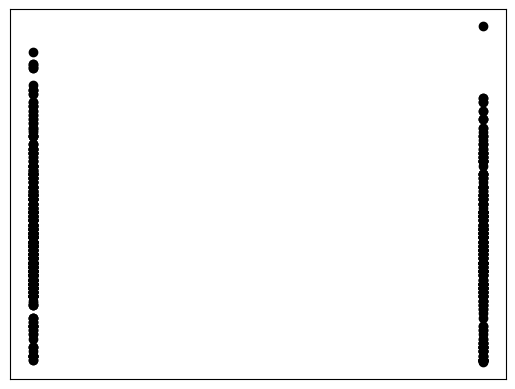

In [99]:
# Plot outputs
plt.scatter(df3['Survived'], df3['Age'], color="black")
# plt.plot(ages_X_test['Fare'], ages_y_predict, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Predict Age of Passengers

#### Useful Attributes to Predict Age
- Parch
- Sfx
- Has Second Name
- Fare
- Pclass

#### Ideas
- Round each of the ages to the nearest half decade
- Design custom buckets or bins for age groups
    - Baby: 0-3
    - Youth: 4-12
    - Teen: 13-17
    - Young Adult: 18-25
    - Adult: 26-40
    - Older Adult: 41-55
    - Elder: 56-


In [ ]:
# Filter df to only ages
passengers_with_ages = df3.filter(~pl.col("Age").is_null())

In [97]:
passengers_with_ages.filter(pl.col('Age')<10)
passengers_with_ages.filter((pl.col('Sex')=='female') & (pl.col('Age')< 18))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last,First,Sfx,Second Name,Has Second Name,Adult
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,str,str,str,str,i32,i64
10,1,2,"""Nasser, Mrs. N…","""female""",14.0,1,0,"""237736""",30.0708,null,"""C""","""Nasser""","""Nicholas (Adel…","""Mrs""","""Adele Achem""",1,0
11,1,3,"""Sandstrom, Mis…","""female""",4.0,1,1,"""PP 9549""",16.7,"""G6""","""S""","""Sandstrom""","""Marguerite Rut…","""Miss""",null,0,0
15,0,3,"""Vestrom, Miss.…","""female""",14.0,0,0,"""350406""",7.8542,null,"""S""","""Vestrom""","""Hulda Amanda A…","""Miss""",null,0,0
23,1,3,"""McGowan, Miss.…","""female""",15.0,0,0,"""330923""",8.0292,null,"""Q""","""McGowan""","""Anna ""Annie""""","""Miss""",null,0,0
25,0,3,"""Palsson, Miss.…","""female""",8.0,3,1,"""349909""",21.075,null,"""S""","""Palsson""","""Torborg Danira…","""Miss""",null,0,0
40,1,3,"""Nicola-Yarred,…","""female""",14.0,1,0,"""2651""",11.2417,null,"""C""","""Nicola-Yarred""","""Jamila""","""Miss""",null,0,0
44,1,2,"""Laroche, Miss.…","""female""",3.0,1,2,"""SC/Paris 2123""",41.5792,null,"""C""","""Laroche""","""Simonne Marie …","""Miss""",null,0,0
59,1,2,"""West, Miss. Co…","""female""",5.0,1,2,"""C.A. 34651""",27.75,null,"""S""","""West""","""Constance Miri…","""Miss""",null,0,0
69,1,3,"""Andersson, Mis…","""female""",17.0,4,2,"""3101281""",7.925,null,"""S""","""Andersson""","""Erna Alexandra…","""Miss""",null,0,0


In [73]:
passengers_with_ages_y = passengers_with_ages.select(['Age'])
passengers_with_ages_y = passengers_with_ages_y.with_columns(pl.col("Age").map_elements(lambda x: 
        'Child' if x <=10
        else 'Young' if x>10 and x<=20
        else 'Adult' if x>20 and x<=40
        else 'Old'
    )
)
passengers_with_ages_X_cols = ['Parch', 'Sfx', 'Has Second Name', 'Fare', 'Pclass']
passengers_with_ages_X = passengers_with_ages.select(passengers_with_ages_X_cols)

In [74]:
# Switching to pandas df to create dummy variables the suffixes for each passendger's name
passengers_with_ages_X = passengers_with_ages_X.to_pandas()
passengers_with_ages_y = passengers_with_ages_y.to_pandas()

passengers_with_ages_X = pd.get_dummies(data=passengers_with_ages_X, drop_first=True)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import matplotlib.pyplot as plt

In [76]:
# Randomly sample 95% for training while the reset will be for testing.
ages_X_train, ages_X_test, ages_y_train, ages_y_test = train_test_split(passengers_with_ages_X, passengers_with_ages_y, test_size=0.1, random_state=42)

In [77]:
ages_X_test

,Parch,Has Second Name,Fare,Pclass,Sfx_Col,Sfx_Don,Sfx_Dr,Sfx_Jonkheer,Sfx_Lady,Sfx_Major,Sfx_Master,Sfx_Miss,Sfx_Mlle,Sfx_Mme,Sfx_Mr,Sfx_Mrs,Sfx_Ms,Sfx_Rev,Sfx_Sir,Sfx_the Countess
120,0,0,13.0000,2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
329,1,0,18.7500,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
39,0,1,26.0000,2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
294,0,0,69.3000,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
654,0,0,6.4500,3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1,0,55.0000,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
591,0,0,7.9250,3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
697,0,0,5.0000,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
398,0,0,8.6625,3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


## Testing Different Models

In [78]:
reg = ensemble.RandomForestClassifier()
# reg = linear_model.LogisticRegression()

In [79]:
ages_y_train

,Age
593,Young
302,Young
101,Old
525,Young
192,Young
...,...
71,Old
106,Adult
270,Old
435,Adult


In [80]:
reg.fit(X=ages_X_train, y=ages_y_train)

c:\Users\Connor\OneDrive\Desktop\GitHub\Python\ML\Titanic\venv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [81]:
# reg.coef_

In [82]:
ages_y_predict = reg.predict(ages_X_test)

In [83]:
ages_y_predict

array(['Old', 'Child', 'Adult', 'Adult', 'Adult', 'Child', 'Adult',
       'Adult', 'Young', 'Adult', 'Adult', 'Adult', 'Old', 'Adult',
       'Adult', 'Adult', 'Adult', 'Adult', 'Old', 'Adult', 'Child',
       'Adult', 'Young', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult',
       'Young', 'Adult', 'Young', 'Child', 'Adult', 'Adult', 'Adult',
       'Young', 'Adult', 'Old', 'Old', 'Adult', 'Child', 'Adult', 'Adult',
       'Adult', 'Old', 'Adult', 'Adult', 'Child', 'Adult', 'Old', 'Young',
       'Adult', 'Young', 'Adult', 'Adult', 'Adult', 'Old', 'Child',
       'Adult', 'Adult', 'Old', 'Adult', 'Adult', 'Adult', 'Adult', 'Old',
       'Child', 'Adult', 'Adult', 'Adult', 'Adult', 'Old'], dtype=object)

In [84]:
# The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(ages_y_test, ages_y_predict))
# The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(ages_y_test, ages_y_predict))
print("Accuracy score: %.2f" % accuracy_score(ages_y_test, ages_y_predict))

Accuracy score: 0.61


In [85]:
print(classification_report(ages_y_test, ages_y_predict))

              precision    recall  f1-score   support

       Adult       0.63      0.76      0.69        38
       Child       0.75      0.86      0.80         7
         Old       0.73      0.47      0.57        17
       Young       0.14      0.10      0.12        10

    accuracy                           0.61        72
   macro avg       0.56      0.55      0.54        72
weighted avg       0.60      0.61      0.59        72



TypeError: unhashable type: 'numpy.ndarray'

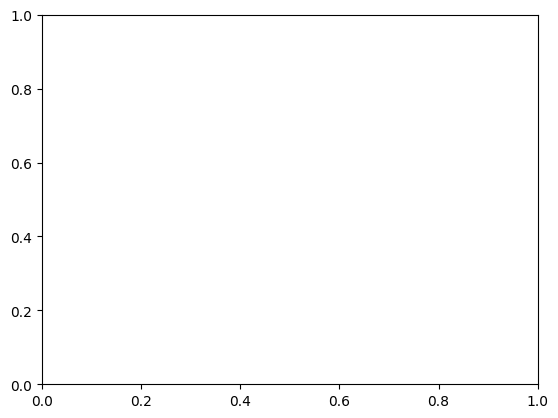

In [62]:
# Plot outputs
plt.scatter(ages_y_test, ages_y_predict, color="black")
# plt.plot(ages_X_test['Fare'], ages_y_predict, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()